## Options Greeks Grap

### Call Option Delta
Delta measures the sensitivity of the option's price to changes in the price of the underlying asset \( S \).

- For call options, delta ranges from 0 to 1.
- Before the strike price (S < K): Delta is low because the option is out-of-the-money.
- At the strike price (S = K): Delta increases rapidly. At-the-money options have deltas around 0.5.
- After the strike price (S > K): Delta approaches 1 as the option becomes deep in-the-money.

As time to expiration (t) decreases, delta becomes steeper around the strike price because there's less time for the underlying asset's price to change, increasing the impact of small price changes.

### Put Option Delta
- For put options, delta ranges from -1 to 0.
- Before the strike price (S < K): Delta is close to -1 because the option is in-the-money.
- At the strike price (S = K): Delta increases rapidly towards 0. At-the-money options have deltas around -0.5.
- After the strike price (S > K): Delta is close to 0 because the option is out-of-the-money.

Similar to call options, as time to expiration (t) decreases, the delta becomes steeper around the strike price.

### Call Option Gamma
Gamma measures the sensitivity of delta to changes in the price of the underlying asset \( S \).

- Gamma is highest when the option is at-the-money (S = K).
- As the underlying asset's price moves away from the strike price (either in-the-money or out-of-the-money), gamma decreases.
- Gamma decreases as time to expiration decreases because the probability of large changes in the underlying asset's price decreases.

### Put Option Gamma
- The behavior of gamma for put options is similar to that for call options.
- Gamma peaks when the underlying price is near the strike price and decreases as the option moves further in-the-money or out-of-the-money.
- As time to expiration decreases, gamma decreases, reflecting reduced sensitivity of delta to changes in the underlying price.

### Call Option Vega
Vega measures the sensitivity of the option's price to changes in volatility of the underlying asset.

- Vega is highest when the option is at-the-money (S = K).
- As the underlying price moves away from the strike price (either in-the-money or out-of-the-money), vega decreases.
- Vega decreases as time to expiration decreases because there's less time for volatility to affect the option's price.

### Put Option Vega
- Vega for put options behaves similarly to that for call options.
- The peak is around the strike price, and it decreases as the option becomes more in-the-money or out-of-the-money.
- The sensitivity to volatility decreases as time to expiration decreases.

### Call Option Rho
Rho measures the sensitivity of the option's price to changes in interest rates.

- For call options, rho is positive.
- Rho increases as the option becomes more in-the-money.
- The impact of rho is higher for longer-term options because there's more time for interest rate changes to affect the option's price.

### Put Option Rho
- For put options, rho is negative.
- Rho decreases (becomes more negative) as the option becomes more in-the-money.
- The impact of rho is higher for longer-term options, similar to call options.

### Call Option Theta
Theta measures the sensitivity of the option's price to the passage of time (time decay).

- For call options, theta is typically negative, indicating that the option's value decreases as time passes.
- Theta is more negative for at-the-money options.
- As the option becomes deep in-the-money or out-of-the-money, theta decreases (becomes less negative).
- As time to expiration decreases, theta becomes more negative, reflecting the accelerating time decay.

### Put Option Theta
- The behavior of theta for put options is similar to that for call options.
- Theta is negative, indicating time decay.
- At-the-money options have the most negative theta.
- Deep in-the-money or out-of-the-money options have less negative theta.
- As expiration approaches, theta becomes more negative.

### Import Libraries

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

### Define the functions

In [3]:
def N(z):
    return norm.cdf(z)

# helper function phi
def phi(x):
    pi = 3.1416
    return np.exp(-0.5 * x * x) / (np.sqrt(2.0 * pi))

def gamma(S, K, r, t, vol):
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    return phi(d1) / (S * vol * np.sqrt(t))

def vega(S, K, r, t, vol):
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    return (S * phi(d1) * np.sqrt(t)) / 100.0

# call options
def call_delta(S, K, r, t, vol):
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    return N(d1)

def call_theta(S, K, r, t, vol):
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    theta = -((S * phi(d1) * vol) / (2.0 * np.sqrt(t))) - (r * K * np.exp(-r * t) * N(d2))
    return theta / 365.0

def call_rho(S, K, r, t, vol):
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    rho = K * t * np.exp(-r * t) * N(d2)
    return rho / 100.0

# put options
def put_delta(S, K, r, t, vol):
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    return N(d1) - 1.0

def put_theta(S, K, r, t, vol):
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    theta = -((S * phi(d1) * vol) / (2.0 * np.sqrt(t))) + (r * K * np.exp(-r * t) * N(-d2))
    return theta / 365.0

def put_rho(S, K, r, t, vol):
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    rho = -K * t * np.exp(-r * t) * N(-d2)
    return rho / 100.0

### Plot the Greeks

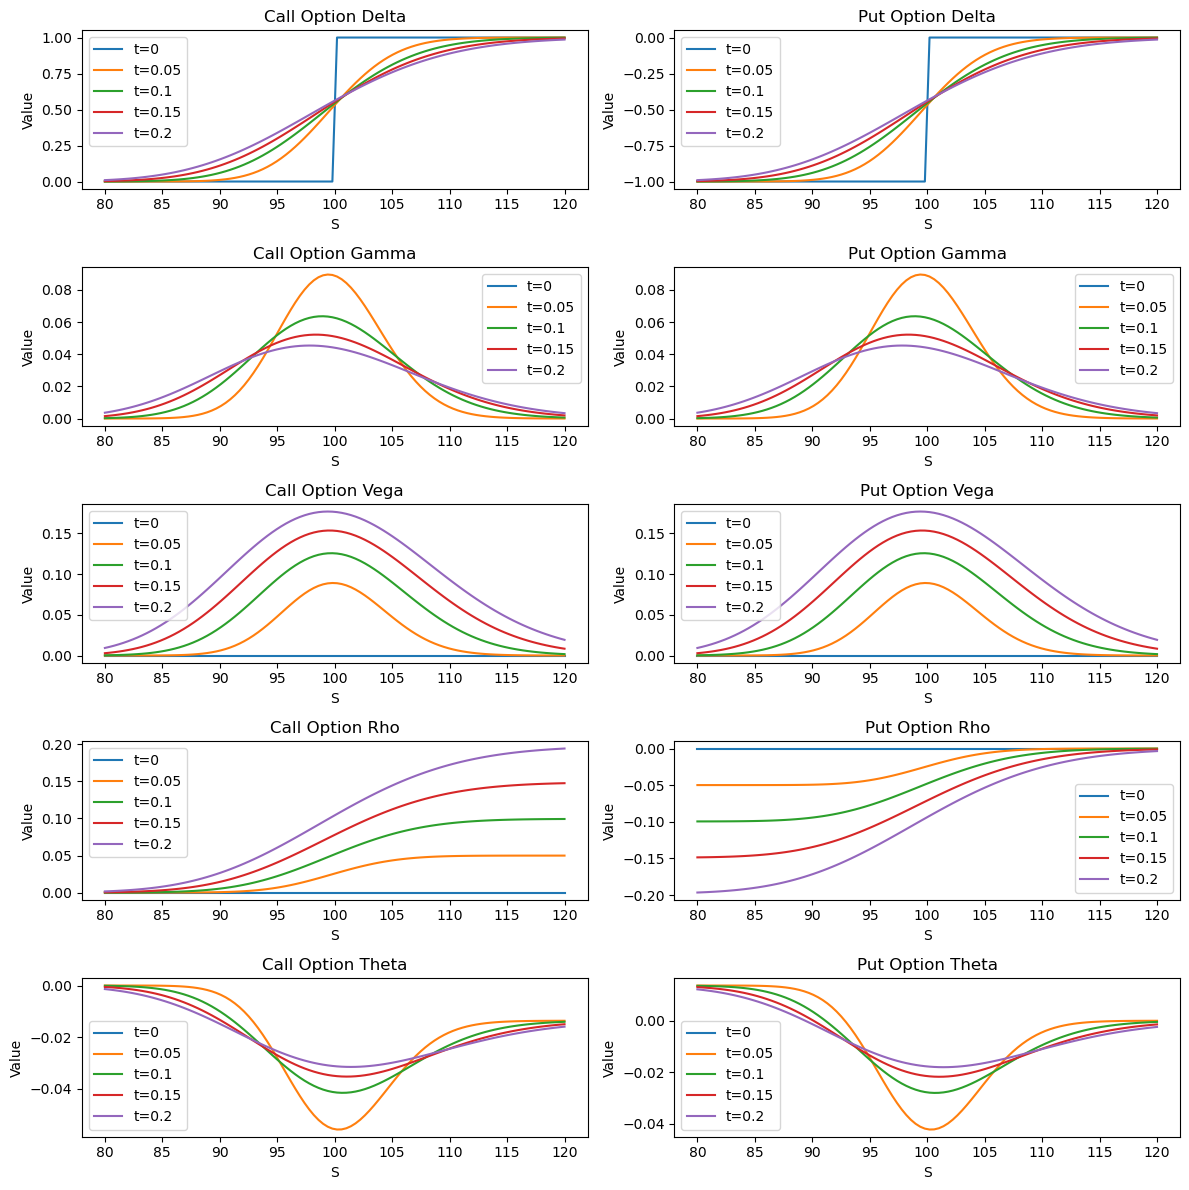

In [9]:
# Plotting
def plot_greeks():
    S = np.linspace(80, 120, 100) # Underlying prices
    K = 100 # Strike price
    r = 0.05 # Risk-free rate
    vol = 0.2 # Volatility
    t_values = [0, 0.05, 0.1, 0.15, 0.2] # Different time to maturities

    fig, axs = plt.subplots(5, 2, figsize=(12, 12))

    for t in t_values:
        # Call option Greeks
        axs[0, 0].plot(S, [call_delta(s, K, r, t, vol) for s in S], label=f't={t}')
        axs[1, 0].plot(S, [gamma(s, K, r, t, vol) for s in S], label=f't={t}')
        axs[2, 0].plot(S, [vega(s, K, r, t, vol) for s in S], label=f't={t}')
        axs[3, 0].plot(S, [call_rho(s, K, r, t, vol) for s in S], label=f't={t}')
        axs[4, 0].plot(S, [call_theta(s, K, r, t, vol) for s in S], label=f't={t}')
        
        # Put option Greeks
        axs[0, 1].plot(S, [put_delta(s, K, r, t, vol) for s in S], label=f't={t}')
        axs[1, 1].plot(S, [gamma(s, K, r, t, vol) for s in S], label=f't={t}')
        axs[2, 1].plot(S, [vega(s, K, r, t, vol) for s in S], label=f't={t}')
        axs[3, 1].plot(S, [put_rho(s, K, r, t, vol) for s in S], label=f't={t}')
        axs[4, 1].plot(S, [put_theta(s, K, r, t, vol) for s in S], label=f't={t}')
    
    # Setting titles and labels
    axs[0, 0].set_title('Call Option Delta')
    axs[1, 0].set_title('Call Option Gamma')
    axs[2, 0].set_title('Call Option Vega')
    axs[3, 0].set_title('Call Option Rho')
    axs[4, 0].set_title('Call Option Theta')
    
    axs[0, 1].set_title('Put Option Delta')
    axs[1, 1].set_title('Put Option Gamma')
    axs[2, 1].set_title('Put Option Vega')
    axs[3, 1].set_title('Put Option Rho')
    axs[4, 1].set_title('Put Option Theta')

    for ax in axs.flat:
        ax.set(xlabel='S', ylabel='Value')
        ax.legend()

    plt.tight_layout()
    plt.show()

plot_greeks()